In [1]:
import torch.nn as nn
import torch
import torchvision.models as models
model_conv = models.resnet50(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False
num_ftrs = model_conv.fc.in_features
print(model_conv.fc.in_features)

2048


In [2]:
model_conv.fc = nn.Linear(num_ftrs,300)
print(model_conv.fc)

embed = nn.LSTM(300,256)

model = nn.Sequential(
    model_conv,
    embed
)

Linear(in_features=2048, out_features=300, bias=True)


In [3]:
from experiment import Experiment
import sys

exp_name = 'default'


print("Running Experiment: ", exp_name)
exp = Experiment(exp_name)
print(exp)

Running Experiment:  default
loading annotations into memory...
Done (t=0.69s)
creating index...
index created!
loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
Using the saved vocab.
loading annotations into memory...
Done (t=0.63s)
creating index...
index created!
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


0 number epoch


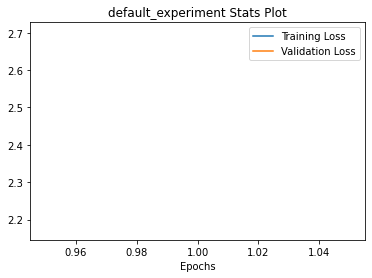

Epoch: 1, Train Loss: 2.7013524635550903, Val Loss: 2.172196025996245, Took 0:03:25.640719, ETA: 0:30:50.766471

1 number epoch


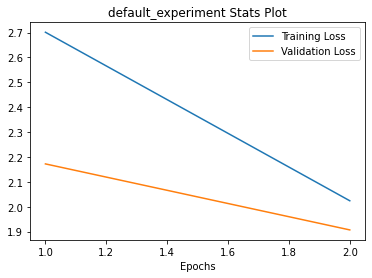

Epoch: 2, Train Loss: 2.0240172291129723, Val Loss: 1.9068550287291062, Took 0:03:26.558463, ETA: 0:27:32.467704

2 number epoch


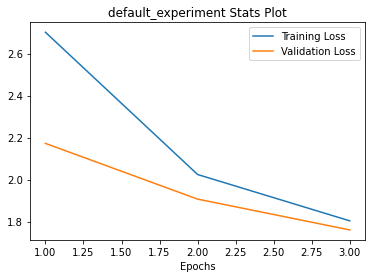

Epoch: 3, Train Loss: 1.8033734613267827, Val Loss: 1.7602151087088178, Took 0:03:32.148950, ETA: 0:24:45.042650

3 number epoch


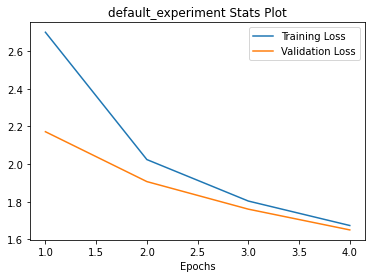

Epoch: 4, Train Loss: 1.6732692652961232, Val Loss: 1.6498020379118217, Took 0:03:41.017103, ETA: 0:22:06.102618

4 number epoch


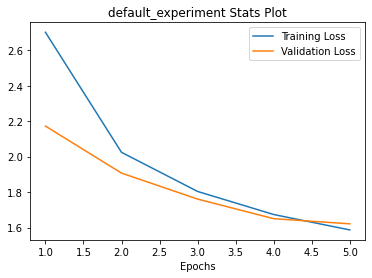

Epoch: 5, Train Loss: 1.5864174964092033, Val Loss: 1.6207404321478318, Took 0:03:42.863324, ETA: 0:18:34.316620

5 number epoch


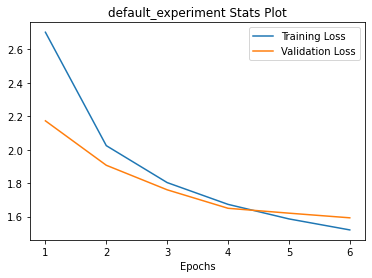

Epoch: 6, Train Loss: 1.5206308266551225, Val Loss: 1.5929040243459303, Took 0:03:43.803856, ETA: 0:14:55.215424

6 number epoch


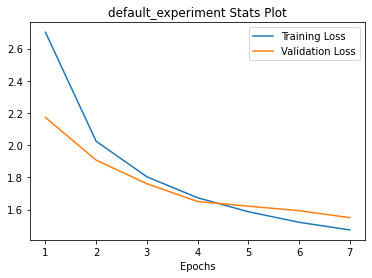

Epoch: 7, Train Loss: 1.473289883013853, Val Loss: 1.549398377884266, Took 0:03:31.266399, ETA: 0:10:33.799197

7 number epoch


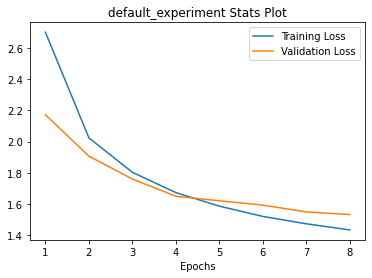

Epoch: 8, Train Loss: 1.434074795123228, Val Loss: 1.5329045731891957, Took 0:03:23.775245, ETA: 0:06:47.550490

8 number epoch


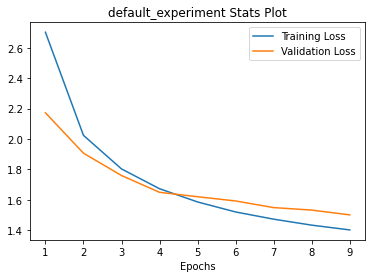

Epoch: 9, Train Loss: 1.4027745617214347, Val Loss: 1.501554622206577, Took 0:03:25.148456, ETA: 0:03:25.148456

9 number epoch


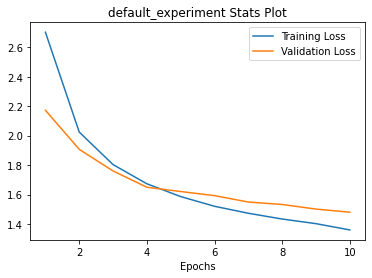

Epoch: 10, Train Loss: 1.3602702871630692, Val Loss: 1.4805496570675871, Took 0:03:30.293676, ETA: 0:00:00

torch.Size([64, 3, 256, 256])
torch.Size([64, 1, 300])


In [4]:
exp.run()
result = None
for i, (images,captions,idk) in enumerate(exp.train_loader):
    if i == 0:
        images = images.to("cuda")
        captions = captions.to("cuda")
        print(images.shape)
        result = exp.model.generate(images,exp.vocab,20)
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 1, 300])
<start>
a
man
is
playing
tennis
on
a
tennis
court
.
<end>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>


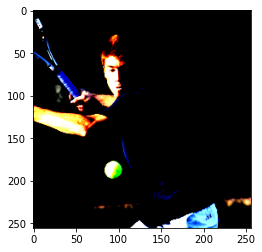

In [44]:
import matplotlib.pyplot as plt
for i, (images,captions,idk) in enumerate(exp.train_loader):
    if i == 0:
        images = images.to("cuda")
        captions = captions.to("cuda")
        plt.imshow(images[17].cpu().permute(1, 2, 0))
        result = exp.model.generate(images,exp.vocab,20)
        break
for i in result:
    print(exp.vocab.idx2word[i[17].item()])

In [6]:
# import matplotlib.pyplot as plt

# #plt.imshow(my_tensor.numpy()[0], cmap='gray')
# def generate_caption(vocab,captions):
#     string = ""
#     for word in captions:
#         string = string + vocab.idx2word[word.item()] + " "
#     print(string)

        
# def view_sent(output,vocab):
#     predicted = []
#     string = ""
#     for i in output:
#         wordidx = torch.argmax(i).item()
#         string += vocab.idx2word[wordidx] + " "
#     print(string)
# loss_t = 0
# for j in range(10):        
#     for i, (images,captions,idk) in enumerate(exp.train_loader):
#         images = images.to("cuda")
#         captions = captions.to("cuda")

#         output = exp.model(images,captions)
#         #print(output.shape,captions.shape)
#         loss = exp.criterion(output.reshape(-1,len(exp.vocab)),captions.reshape(-1))
#         loss_t+=loss
#         if i % 50 == 0:
#             print(loss,i)
#             generate_caption(exp.vocab,captions[0])
#             view_sent(output[0],exp.vocab)
#         loss.backward()
#         exp.optimizer.step()
    


    
    